# <span style="color:royalblue"> [1주차] 과제_2024_MST</span> <img src="./data/logo.png" style="width: 120px;" align="right">
# 2024 주택 매매 가격지수 데이터 분석 

--- 

<div style="text-align: right"> Final Edition : 2024.07.12<br>
    copyrightⓒ 2022 All rights reserved by Data Lover Pablo </div>

# 과제1. 정부별 주택 매매 가격지수 시각화
* 목표 : 전국 주택매매 가격지수와 사는지역의 주택매매 가격지수가 각 정부별로 어떻게 움직였는지 데이터를 분석할 수 있다.

[주택매매가격지수 데이터 수집 링크(KOSIS)](https://kosis.kr/statHtml/statHtml.do?orgId=101&tblId=DT_1YL1701&vw_cd=MT_GTITLE01&list_id=101_06_2&seqNo=&lang_mode=ko&language=kor&obj_var_id=&itm_id=&conn_path=E1)

In [1]:
# 1. 라이브러리 불러오기

import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

In [2]:
# 2. 데이터 불러오기

df_price = pd.read_csv("data/주택매매가격지수_시도_시_군_구__20240712231149.csv", encoding="cp949") #, nrows=3

In [3]:
df_price

,행정구역별,2003.11,2003.12,2004.01,2004.02,2004.03,2004.04,2004.05,2004.06,2004.07,...,2023.08,2023.09,2023.10,2023.11,2023.12,2024.01,2024.02,2024.03,2024.04,2024.05
0,전국,61.5,61.0,60.7,60.7,60.8,60.9,60.9,60.8,60.6,...,95.8,96.0,96.2,96.3,96.2,96.0,95.9,95.8,95.7,95.7
1,서울특별시,55.6,55.2,55.1,55.3,55.5,55.7,55.7,55.6,55.4,...,96.2,96.5,96.7,96.8,96.7,96.6,96.5,96.5,96.6,96.8
2,부산광역시,66.4,65.7,65.2,65.1,65.1,65.1,65.0,64.7,64.3,...,93.8,93.7,93.6,93.4,93.1,92.9,92.6,92.4,92.2,92.1
3,대구광역시,58.2,57.5,57.0,57.0,57.1,57.1,57.0,56.9,56.8,...,85.9,86.0,86.1,86.1,85.9,85.6,85.2,84.9,84.7,84.5
4,인천광역시,55.9,55.4,55.0,55.0,54.9,54.9,54.8,54.6,54.6,...,94.4,94.6,94.7,94.5,94.2,94.0,93.9,93.9,93.8,93.9
5,광주광역시,61.9,61.5,61.3,61.2,61.3,61.4,61.3,61.3,61.4,...,97.2,97.2,97.3,97.4,97.4,97.3,97.2,97.1,97.0,97.0
6,대전광역시,59.6,58.7,58.7,59.1,59.3,59.5,60.0,60.2,60.4,...,92.7,93.0,93.2,93.4,93.4,93.4,93.3,93.2,93.1,93.0
7,울산광역시,56.7,56.3,55.9,56.1,56.3,56.3,56.7,56.7,56.8,...,93.4,93.5,93.7,93.7,93.7,93.6,93.6,93.5,93.5,93.4
8,세종특별자치시,-,-,-,-,-,-,-,-,-,...,79.9,80.2,80.3,80.3,80.1,79.8,79.1,78.2,77.6,76.9
9,경기도,56.4,56.0,55.7,55.7,55.9,56.0,55.9,55.6,55.3,...,94.3,94.8,95.2,95.3,95.2,95.0,94.8,94.6,94.5,94.4


In [4]:
# 3. 데이터 재구조화

df = pd.melt(df_price, id_vars="행정구역별", var_name='기간', value_name='주택매매가격지수')

#. 3-1. 칼럼명 변경
df.columns = ["지역", "기간", "주택매매가격지수"]

In [5]:
# 4. 데이터 전처리

#. 4-1. 데이터 파싱(분할)
df["연도"] = df["기간"].str.split(".", expand=True)[0]
df["월"] = df["기간"].str.split(".", expand=True)[1]

#. 4-2. 결측치 대체
df["주택매매가격지수"] = df["주택매매가격지수"].replace("0", np.nan)
df["주택매매가격지수"] = df["주택매매가격지수"].replace("-", np.nan)

#. 4-3. 데이터 타입변경
df["주택매매가격지수"] = pd.to_numeric(df["주택매매가격지수"])

In [6]:
# 5. 전국과 사는 지역 데이터 추출
df_temp = df[df["지역"].isin(["전국", "서울특별시"])].copy()
df_temp['기간'] = pd.to_datetime(df_temp['기간'])#,format='ISO8601') #To ensure parsing is consistent and as-expected, please specify a format.

df_seoul = df_temp[df_temp['지역']=="서울특별시"]
df_nation = df_temp[df_temp['지역']=="전국"]

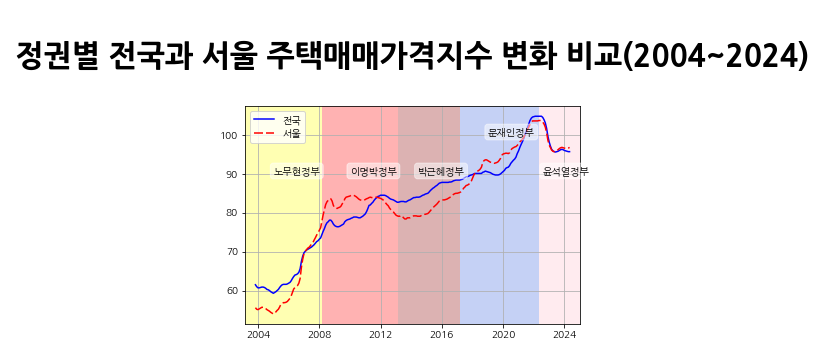

In [7]:
# 6. 그래프 시각화

import matplotlib.pyplot as plt
from datetime import datetime

# 1. 기본 스타일 설정
plt.style.use('default')
plt.rcParams['figure.figsize'] = (20, 11)
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['font.size'] = 20

x = df_seoul['기간']
y1 = df_nation['주택매매가격지수']
y2 = df_seoul['주택매매가격지수']

fig, ax = plt.subplots()

line1, = ax.plot(x, y1, label='전국', color='blue')
line2, = ax.plot(x, y2, dashes=[6, 2], label='서울', color='red')


# 구간별 색상변경
plt.axvspan(datetime(2003, 2, 25), datetime(2008, 2, 25), facecolor='yellow', alpha=0.3)
plt.axvspan(datetime(2008, 2, 25), datetime(2013, 2, 24), facecolor='red', alpha=0.3)
plt.axvspan(datetime(2013, 2, 25), datetime(2017, 3, 10), facecolor='darkred', alpha=0.3)
plt.axvspan(datetime(2017, 3, 10), datetime(2022, 5, 9), facecolor='royalblue', alpha=0.3)
plt.axvspan(datetime(2022, 5, 10), datetime(2024, 12, 31), facecolor='pink', alpha=0.3)


# 구간별 텍스트
mybox={'facecolor':'w','edgecolor':'w','boxstyle':'round','alpha':0.5}
plt.text(datetime(2005, 1, 1),90,'노무현정부', bbox=mybox)
plt.text(datetime(2010, 1, 1),90,'이명박정부', bbox=mybox)
plt.text(datetime(2014, 6, 1),90,'박근혜정부', bbox=mybox)
plt.text(datetime(2019, 1, 1),100,'문재인정부', bbox=mybox)
plt.text(datetime(2022, 8, 1),90,'윤석열정부', bbox=mybox)

plt.title('\n 정권별 전국과 서울 주택매매가격지수 변화 비교(2004~2024) \n', fontsize=30, fontweight=1000)

ax.margins(x=0)
ax.grid()
ax.legend()
plt.show()

---

# 과제2. 전세지수와 매매지수 시각화
* 목표 : 전국 전세지수와 매매지수가 정부 정책에 따라서 어떻게 움직였는지 데이터를 분석할 수 있다.

[매매가격지수 데이터 수집 링크](https://kosis.kr/statHtml/statHtml.do?orgId=101&tblId=DT_1YL13501E&conn_path=I2), 
[전세 데이터 수집 링크](https://kosis.kr/statHtml/statHtml.do?orgId=101&tblId=DT_1YL13501E&conn_path=I2)

In [8]:
# 오류정정(감사합니다.)
import pandas as pd

rent_index = pd.read_csv("./data/아파트전세가격지수_시도_시_군_구__20240712233244.csv", encoding="cp949", skiprows=1, names=['시점', '전세'])
sales_index = pd.read_csv("./data/아파트매매가격지수_시도_시_군_구__20240712233237.csv", encoding="cp949", skiprows=1, names=['시점', '매매'])

In [9]:
rent_index.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   시점      247 non-null    float64
 1   전세      247 non-null    float64
dtypes: float64(2)
memory usage: 4.0 KB


In [10]:
rent_index['연도']= rent_index['시점'].astype(str).str.split('.', expand=True)[0]
rent_index['월']= rent_index['시점'].astype(str).str.split('.', expand=True)[1]

sales_index['연도']= sales_index['시점'].astype(str).str.split('.', expand=True)[0]
sales_index['월']= sales_index['시점'].astype(str).str.split('.', expand=True)[1]

In [11]:
rent_index.head(11)

,시점,전세,연도,월
0,2003.11,49.7,2003,11
1,2003.12,49.2,2003,12
2,2004.01,49.1,2004,01
3,2004.02,49.3,2004,02
4,2004.03,49.6,2004,03
5,2004.04,49.7,2004,04
6,2004.05,49.7,2004,05
7,2004.06,49.3,2004,06
8,2004.07,49.0,2004,07
9,2004.08,48.5,2004,08


In [12]:
# 월표기 오류부분 정정
rent_index['월'] = rent_index['월'].replace("1", "10")
sales_index['월'] = sales_index['월'].replace("1", "10")

In [13]:
rent_index.head(11)

,시점,전세,연도,월
0,2003.11,49.7,2003,11
1,2003.12,49.2,2003,12
2,2004.01,49.1,2004,01
3,2004.02,49.3,2004,02
4,2004.03,49.6,2004,03
5,2004.04,49.7,2004,04
6,2004.05,49.7,2004,05
7,2004.06,49.3,2004,06
8,2004.07,49.0,2004,07
9,2004.08,48.5,2004,08


In [14]:
# 시점을 수정된 날짜로 재조정 # 오류정정(감사합니다.)
rent_index['시점'] = rent_index['연도'] + "-" + rent_index['월']
sales_index['시점'] = sales_index['연도'] + "-" + sales_index['월']

In [15]:
rent_index.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   시점      247 non-null    object 
 1   전세      247 non-null    float64
 2   연도      247 non-null    object 
 3   월       247 non-null    object 
dtypes: float64(1), object(3)
memory usage: 7.8+ KB


In [16]:
# rent_index['시점'] = rent_index['시점'].astype(float)
# sales_index['시점'] = sales_index['시점'].astype(float)

In [17]:
# rent_index['시점'] = rent_index['시점'].astype(str)
# sales_index['시점'] = sales_index['시점'].astype(str)

In [18]:
# 데이터 타입 변경 (문자열 -> 날짜)
rent_index['시점'] = pd.to_datetime(rent_index['시점'])
sales_index['시점'] = pd.to_datetime(sales_index['시점'])

In [19]:
rent_index['시점'].head(11)

0    2003-11-01
1    2003-12-01
2    2004-01-01
3    2004-02-01
4    2004-03-01
5    2004-04-01
6    2004-05-01
7    2004-06-01
8    2004-07-01
9    2004-08-01
10   2004-09-01
Name: 시점, dtype: datetime64[ns]

In [20]:
sales_index.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   시점      247 non-null    datetime64[ns]
 1   매매      247 non-null    float64       
 2   연도      247 non-null    object        
 3   월       247 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 7.8+ KB


In [21]:
# # 전세 데이터 와 매매 데이터를 병합
# df_merged = pd.merge_asof(
#     rent_index, sales_index,
#     on='시점', direction='nearest')

In [22]:
#  right keys must be sorted 에러 발생시
# 전세 데이터 와 매매 데이터를 병합
df_merged = pd.merge_asof(
    rent_index.sort_values(by='시점'), sales_index.sort_values(by='시점'),
    on='시점', direction='nearest')

In [23]:
rent_index.head(11)

,시점,전세,연도,월
0,2003-11-01,49.7,2003,11
1,2003-12-01,49.2,2003,12
2,2004-01-01,49.1,2004,01
3,2004-02-01,49.3,2004,02
4,2004-03-01,49.6,2004,03
5,2004-04-01,49.7,2004,04
6,2004-05-01,49.7,2004,05
7,2004-06-01,49.3,2004,06
8,2004-07-01,49.0,2004,07
9,2004-08-01,48.5,2004,08


In [24]:
# df_merged.isnull().sum()

In [25]:
df_merged.shape

(247, 7)

In [26]:
df_merged.head(30)

,시점,전세,연도_x,월_x,매매,연도_y,월_y
0,2003-11-01,49.7,2003,11,55.4,2003,11
1,2003-12-01,49.2,2003,12,55.1,2003,12
2,2004-01-01,49.1,2004,01,55.0,2004,01
3,2004-02-01,49.3,2004,02,55.1,2004,02
4,2004-03-01,49.6,2004,03,55.4,2004,03
5,2004-04-01,49.7,2004,04,55.6,2004,04
6,2004-05-01,49.7,2004,05,55.7,2004,05
7,2004-06-01,49.3,2004,06,55.6,2004,06
8,2004-07-01,49.0,2004,07,55.5,2004,07
9,2004-08-01,48.5,2004,08,55.4,2004,08


In [27]:
x

1      2003-11-01
19     2003-12-01
37     2004-01-01
55     2004-02-01
73     2004-03-01
          ...    
4357   2024-01-01
4375   2024-02-01
4393   2024-03-01
4411   2024-04-01
4429   2024-05-01
Name: 기간, Length: 247, dtype: datetime64[ns]

In [28]:
y1

0       61.5
18      61.0
36      60.7
54      60.7
72      60.8
        ... 
4356    96.0
4374    95.9
4392    95.8
4410    95.7
4428    95.7
Name: 주택매매가격지수, Length: 247, dtype: float64

In [29]:
y2

1       55.6
19      55.2
37      55.1
55      55.3
73      55.5
        ... 
4357    96.6
4375    96.5
4393    96.5
4411    96.6
4429    96.8
Name: 주택매매가격지수, Length: 247, dtype: float64

In [30]:
np.__version__

'1.24.4'

In [31]:
import sys
sys.path.append('/path/to/dir')

In [32]:
# !pip install --user numpy==1.20.3

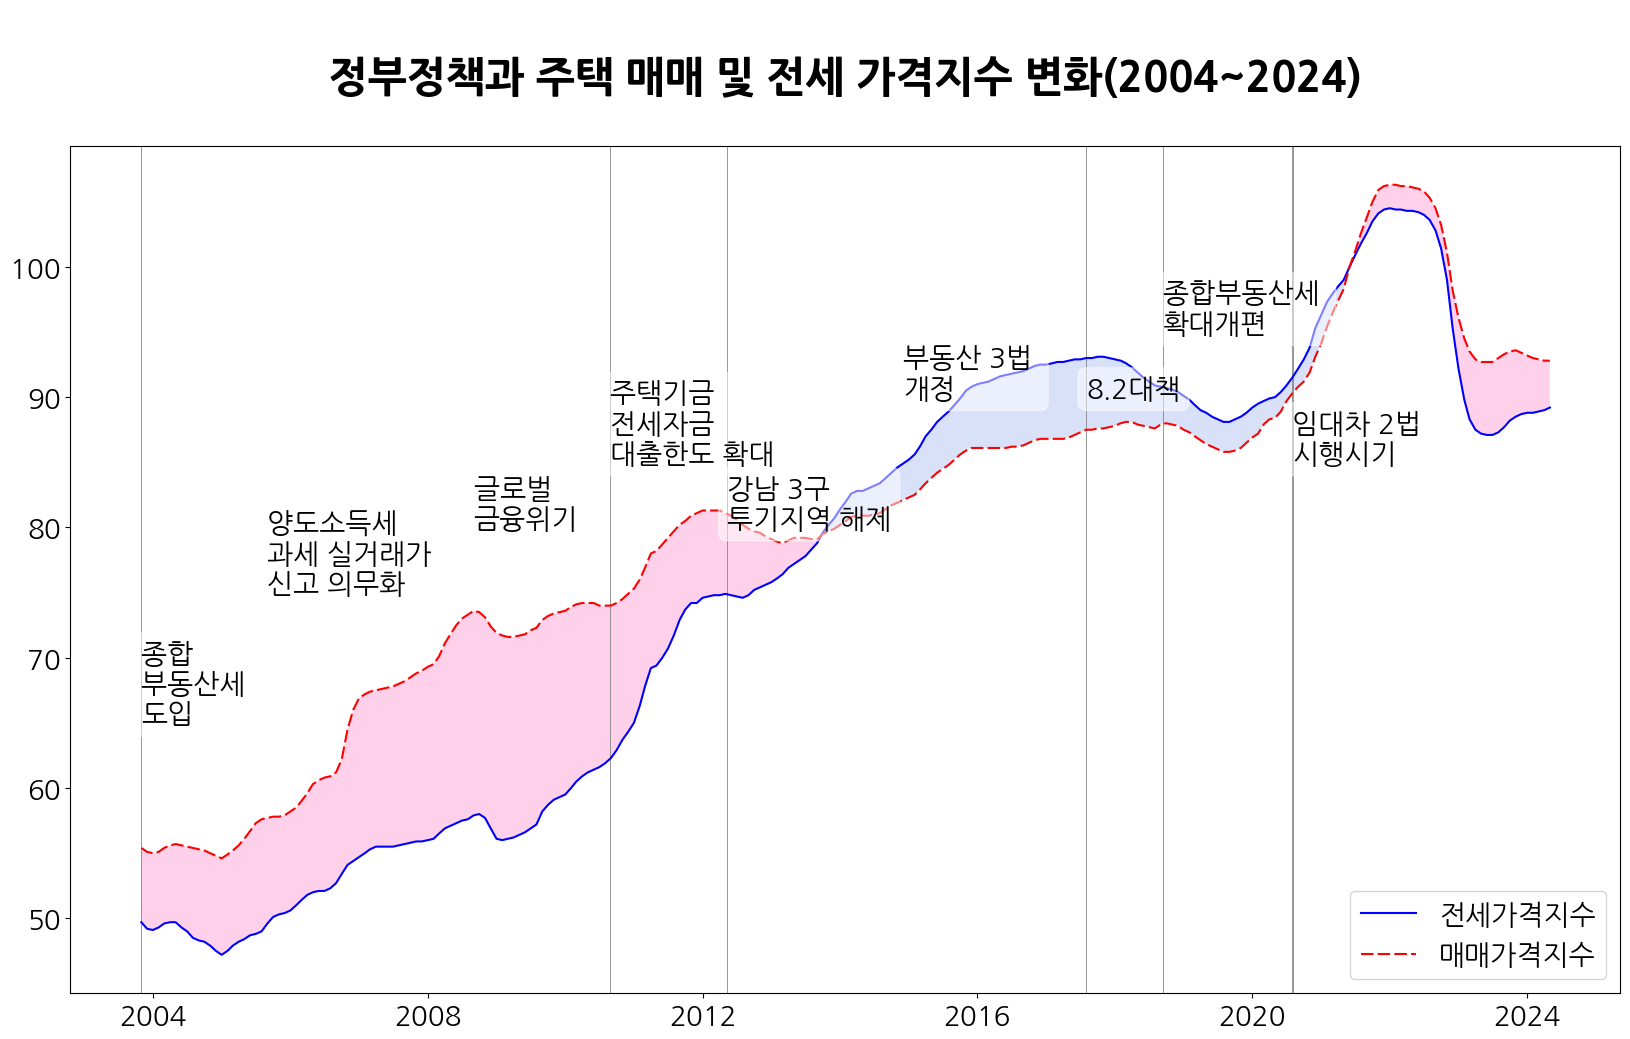

In [33]:
import matplotlib.pyplot as plt
from datetime import datetime

# 1. 기본 스타일 설정
plt.style.use('default')
plt.rcParams['figure.figsize'] = (20, 11)
plt.rc('font', family = 'NanumGothic')
plt.rcParams['font.size'] = 20

x = df_merged['시점']
y1 = df_merged['전세']
y2 = df_merged['매매']

fig, ax = plt.subplots()
line1 = ax.plot(x, y1, label='전세가격지수', color='blue')
line2, = ax.plot(x, y2, dashes=[6, 2], label='매매가격지수', color='red')

# 낮으면 파란색, 높으면 빨간색을 채우기
plt.fill_between(x, y1, y2, where = y1 >= y2, facecolor='royalblue', alpha=0.2)
plt.fill_between(x, y1, y2, where = y1 < y2, facecolor='deeppink', alpha=0.2)

# 세로 영역표시
plt.axvspan(datetime(2003,10,29),datetime(2003,11,3),facecolor = "grey",alpha = 0.8)
plt.axvspan(datetime(2005,8,31),datetime(2005,9,1),facecolor = "grey",alpha = 0.8)
plt.axvspan(datetime(2008,9,1),datetime(2008,9,5),facecolor = "grey",alpha = 0.8)
plt.axvspan(datetime(2010,8,29),datetime(2010,9,2),facecolor = "grey",alpha = 0.8)
plt.axvspan(datetime(2012,5,10),datetime(2012,5,13),facecolor = "grey",alpha = 0.8)
plt.axvspan(datetime(2014,12,1),datetime(2014,12,4),facecolor = "grey",alpha = 0.8)
plt.axvspan(datetime(2017,8,2),datetime(2017,8,5),facecolor = "grey",alpha = 0.8) # 8.2 대책
plt.axvspan(datetime(2018,9,13),datetime(2018,9,17),facecolor = "grey",alpha = 0.8)
plt.axvspan(datetime(2020,7,31),datetime(2020,8,10),facecolor = "grey",alpha = 0.8) # 임대차 2법 시행

# 구간별 텍스트
mybox={'facecolor':'w','edgecolor':'w','boxstyle':'round','alpha':0.5}
plt.text(datetime(2003,10,29),65,'종합 \n부동산세 \n도입',bbox = mybox)
plt.text(datetime(2005,8,31),75,'양도소득세 \n과세 실거래가 \n신고 의무화',bbox = mybox)
plt.text(datetime(2008,9,1),80,'글로벌 \n금융위기',bbox = mybox)
plt.text(datetime(2010,8,29),85,'주택기금 \n전세자금 \n대출한도 확대',bbox = mybox)
plt.text(datetime(2012,5,10),80,'강남 3구 \n투기지역 해제',bbox = mybox)
plt.text(datetime(2014,12,1),90,'부동산 3법 \n개정',bbox = mybox)
plt.text(datetime(2017,8,2),90,'8.2대책',bbox = mybox)
plt.text(datetime(2018,9,13),95,'종합부동산세 \n확대개편',bbox = mybox)
plt.text(datetime(2020,7,31),85,'임대차 2법 \n시행시기',bbox = mybox)

# 제목
plt.title('\n 정부정책과 주택 매매 및 전세 가격지수 변화(2004~2024) \n', fontsize=30, fontweight=1000)

ax.legend()
plt.show()

# 과제3. 정권 및 정책과 전세/매매지수 시각화
* 목표 : 앞선 2가지 데이터 분석을 종합하여 인사이트를 도출할 수 있다.

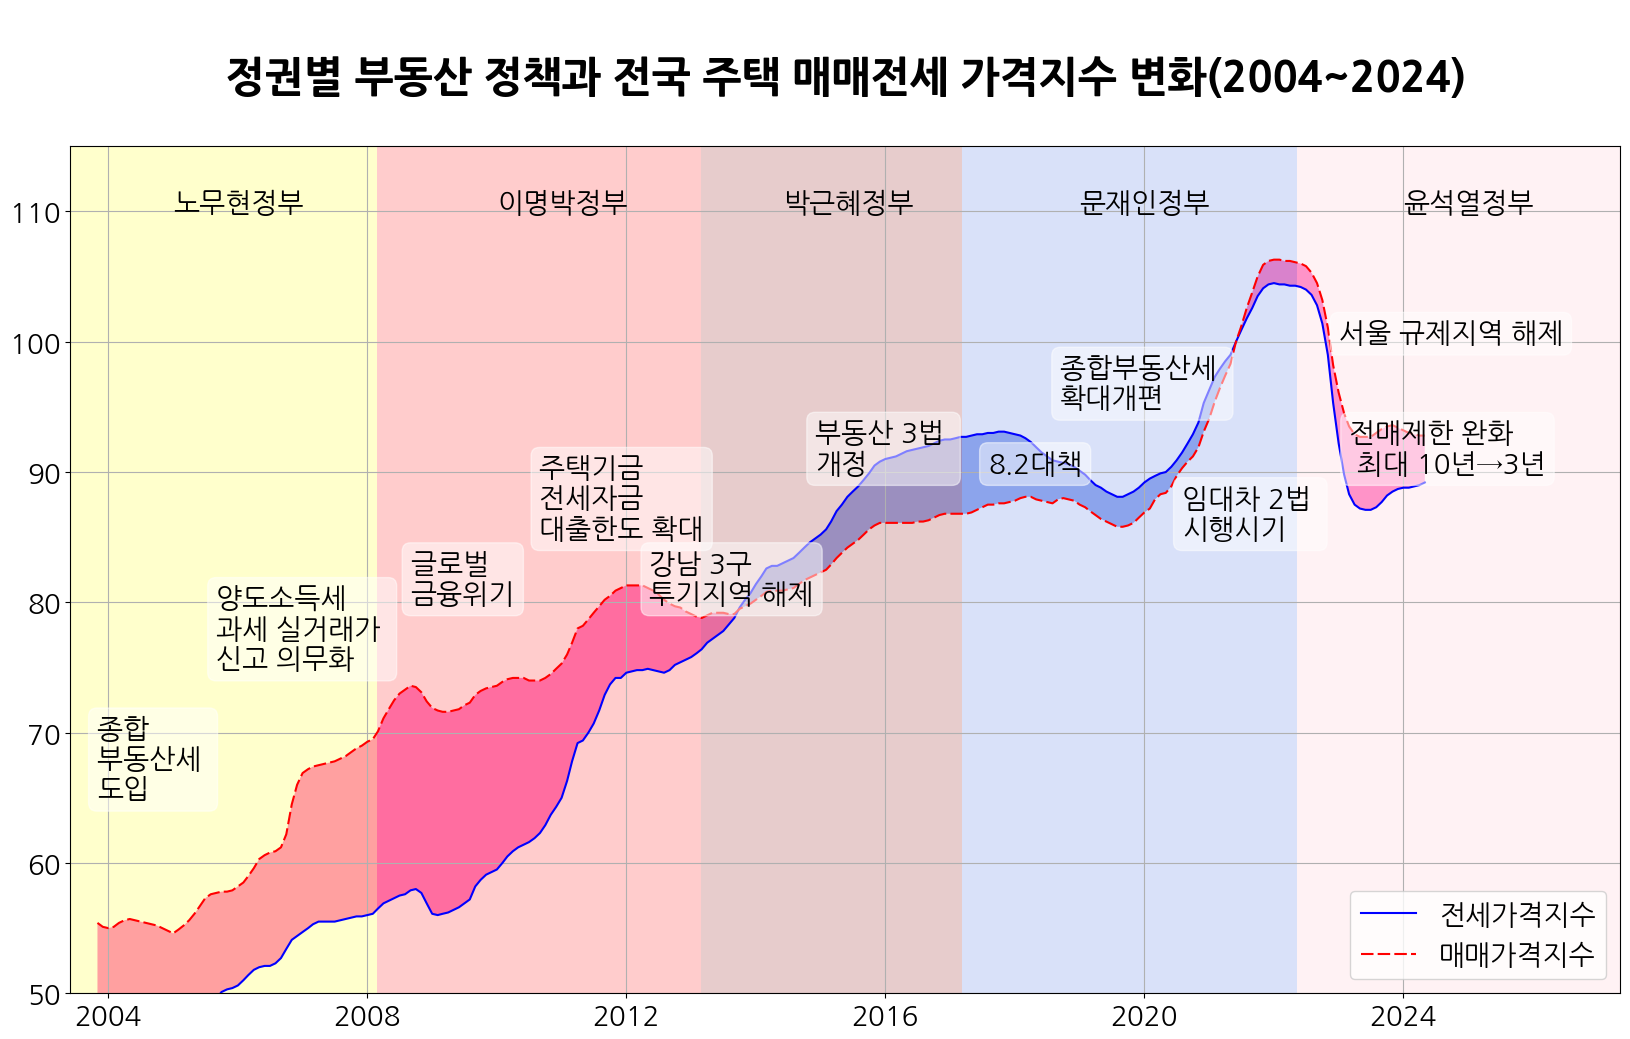

In [34]:
import matplotlib.pyplot as plt
from datetime import datetime

# 1. 기본 스타일 설정
plt.style.use('default')
plt.rcParams['figure.figsize'] = (20, 11)
plt.rc('font', family = 'NanumGothic')
plt.rcParams['font.size'] = 20

x = df_merged['시점']
y1 = df_merged['전세']
y2 = df_merged['매매']

fig, ax = plt.subplots()

# Using set_dashes() to modify dashing of an existing line 
# meaning of ',' after line1 : https://stackoverflow.com/questions/65337288/line-ax-plotx-y
line1, = ax.plot(x, y1, label='전세가격지수', color='blue')
# line1.set_dashes([2, 2, 10, 2])  # 2pt line, 2pt break, 10pt line, 2pt break

# Using plot(..., dashes=...) to set the dashing when creating a line
line2, = ax.plot(x, y2, dashes=[6, 2], label='매매가격지수', color='red')

# 낮으면 파란색, 높으면 빨간색을 채우기
plt.fill_between(x, y1, y2, where = y1 >= y2, facecolor='royalblue', alpha=0.5)
plt.fill_between(x, y1, y2, where = y1 < y2, facecolor='deeppink', alpha=0.5)

# 구간별 텍스트
mybox={'facecolor':'w','edgecolor':'w','boxstyle':'round','alpha':0.5}
plt.text(datetime(2003,10,29),65,'종합 \n부동산세 \n도입',bbox = mybox)
plt.text(datetime(2005,8,31),75,'양도소득세 \n과세 실거래가 \n신고 의무화',bbox = mybox)
plt.text(datetime(2008,9,1),80,'글로벌 \n금융위기',bbox = mybox)
plt.text(datetime(2010,8,29),85,'주택기금 \n전세자금 \n대출한도 확대',bbox = mybox)
plt.text(datetime(2012,5,10),80,'강남 3구 \n투기지역 해제',bbox = mybox)
plt.text(datetime(2014,12,1),90,'부동산 3법 \n개정',bbox = mybox)
plt.text(datetime(2017,8,2),90,'8.2대책',bbox = mybox)
plt.text(datetime(2018,9,13),95,'종합부동산세 \n확대개편',bbox = mybox)
plt.text(datetime(2020,7,31),85,'임대차 2법 \n시행시기',bbox = mybox)
plt.text(datetime(2023,1,1),100,'서울 규제지역 해제',bbox = mybox)
plt.text(datetime(2023,3,1),90,'전매제한 완화 \n 최대 10년→3년',bbox = mybox)


# 구간별 색상변경
plt.axvspan(datetime(2003, 2, 25), datetime(2008, 2, 25), facecolor='yellow', alpha=0.2)
plt.axvspan(datetime(2008, 2, 25), datetime(2013, 2, 24), facecolor='red', alpha=0.2)
plt.axvspan(datetime(2013, 2, 25), datetime(2017, 3, 10), facecolor='darkred', alpha=0.2)
plt.axvspan(datetime(2017, 3, 10), datetime(2022, 5, 9), facecolor='royalblue', alpha=0.2)
plt.axvspan(datetime(2022, 5, 10), datetime(2027, 5, 9), facecolor='pink', alpha=0.2)

# 구간별 텍스트
# mybox={'facecolor':'y','edgecolor':'b','boxstyle':'round','alpha':0.5}
plt.text(datetime(2005, 1, 1),110,'노무현정부')#, bbox=mybox)
plt.text(datetime(2010, 1, 1),110,'이명박정부')#, bbox=mybox)
plt.text(datetime(2014, 6, 1),110,'박근혜정부')#, bbox=mybox)
plt.text(datetime(2019, 1, 1),110,'문재인정부')#, bbox=mybox)
plt.text(datetime(2024, 1, 1),110,'윤석열정부')#, bbox=mybox)

plt.xlim(datetime(2003, 6, 1),datetime(2027, 5, 9))
plt.ylim(50,115)
ax.margins(x=0)
# ax.grid(axis='y')

plt.title('\n 정권별 부동산 정책과 전국 주택 매매전세 가격지수 변화(2004~2024) \n', fontsize=30, fontweight=1000)

ax.grid()
ax.legend(loc=4)
plt.show()

# <span style="color:royalblue"> [2주차] 과제_MST
# 아파트 매매 및 전세가격 변동률 데이터 분석 및 시각화 

--- 

# 과제1. 아파트 매매 가격 변동률 시각화

[KOSIS 데이터 수집](https://kosis.kr/statHtml/statHtml.do?orgId=408&tblId=DT_KAB_11672_S1&vw_cd=MT_ZTITLE&list_id=I1_1&seqNo=&lang_mode=ko&language=kor&obj_var_id=&itm_id=&conn_path=MT_ZTITLE)

In [35]:
import pandas as pd

df_price = pd.read_csv("./data/아파트_매매_실거래가격지수_20240712234249_분석(전월_대비_증감,증감률).csv", encoding="cp949", skiprows=3)#, index_col=0) #, nrows=3

In [36]:
df_price

,시점,원데이터,전월 대비 증감,증감률,원데이터.1,전월 대비 증감.1,증감률.1,원데이터.2,전월 대비 증감.2,증감률.2,...,증감률.24,원데이터.25,전월 대비 증감.25,증감률.25,원데이터.26,전월 대비 증감.26,증감률.26,원데이터.27,전월 대비 증감.27,증감률.27
0,2006.02,60.5,0.5,0.9,63.7,0.9,1.5,57.6,0.0,-0.1,...,-2.4,55.4,0.0,0.0,54.2,-0.2,-0.3,60.9,0.1,0.1
1,2006.03,61.2,0.7,1.1,64.8,1.0,1.6,57.7,0.1,0.2,...,-4.4,55.4,0.0,0.1,54.1,-0.1,-0.2,61.2,0.3,0.5
2,2006.04,61.7,0.5,0.8,65.6,0.8,1.2,57.7,0.0,-0.1,...,0.2,55.5,0.1,0.2,54.0,-0.1,-0.1,61.2,0.0,0.0
3,2006.05,62.0,0.4,0.6,66.2,0.6,0.9,57.6,0.0,0.0,...,1.6,55.6,0.1,0.1,53.8,-0.2,-0.3,61.3,0.1,0.2
4,2006.06,62.5,0.5,0.7,66.5,0.3,0.5,58.4,0.7,1.3,...,3.1,56.0,0.4,0.7,54.2,0.4,0.7,62.4,1.1,1.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214,2023.12,122.1,-1.0,-0.8,139.7,-1.3,-0.9,107.5,-0.8,-0.8,...,-4.8,113.0,-1.1,-1.0,111.2,-1.1,-1.0,104.3,-0.5,-0.5
215,2024.01,122.1,0.0,0.0,139.9,0.1,0.1,107.4,-0.1,-0.1,...,0.8,112.8,-0.2,-0.2,111.1,-0.1,-0.1,104.3,0.0,0.0
216,2024.02,122.3,0.2,0.2,140.5,0.7,0.5,107.2,-0.2,-0.2,...,-0.5,112.8,0.0,0.0,110.8,-0.3,-0.2,104.2,-0.1,-0.1
217,2024.03,122.5,0.2,0.2,140.8,0.3,0.2,107.4,0.2,0.2,...,0.3,113.0,0.2,0.2,110.9,0.1,0.1,104.5,0.3,0.3


In [37]:
df_price = df_price.iloc[:,:13]
# df_price.columns = ['시점','전국_지수','전국_증감률','수도권_지수','수도권_증감률','지방_지수','지방_증감률','서울_지수','서울_증감률']
df_price.columns = ['시점','전국_지수','전국_증감','전국_증감률','수도권_지수','수도권_증감','수도권_증감률','지방_지수','지방_증감','지방_증감률','서울_지수','서울_증감','서울_증감률']

df_price = df_price.replace(np.NaN, 0)

In [38]:
df_price.iloc[0]

시점         2006.02
전국_지수        60.50
전국_증감         0.50
전국_증감률        0.90
수도권_지수       63.70
수도권_증감        0.90
수도권_증감률       1.50
지방_지수        57.60
지방_증감         0.00
지방_증감률       -0.10
서울_지수        59.40
서울_증감         1.00
서울_증감률        1.70
Name: 0, dtype: float64

In [39]:
df_price.columns

Index(['시점', '전국_지수', '전국_증감', '전국_증감률', '수도권_지수', '수도권_증감', '수도권_증감률',
       '지방_지수', '지방_증감', '지방_증감률', '서울_지수', '서울_증감', '서울_증감률'],
      dtype='object')

In [40]:
df_price

,시점,전국_지수,전국_증감,전국_증감률,수도권_지수,수도권_증감,수도권_증감률,지방_지수,지방_증감,지방_증감률,서울_지수,서울_증감,서울_증감률
0,2006.02,60.5,0.5,0.9,63.7,0.9,1.5,57.6,0.0,-0.1,59.4,1.0,1.7
1,2006.03,61.2,0.7,1.1,64.8,1.0,1.6,57.7,0.1,0.2,60.9,1.5,2.5
2,2006.04,61.7,0.5,0.8,65.6,0.8,1.2,57.7,0.0,-0.1,61.6,0.7,1.2
3,2006.05,62.0,0.4,0.6,66.2,0.6,0.9,57.6,0.0,0.0,61.8,0.2,0.4
4,2006.06,62.5,0.5,0.7,66.5,0.3,0.5,58.4,0.7,1.3,61.8,-0.1,-0.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
214,2023.12,122.1,-1.0,-0.8,139.7,-1.3,-0.9,107.5,-0.8,-0.8,156.9,-1.7,-1.1
215,2024.01,122.1,0.0,0.0,139.9,0.1,0.1,107.4,-0.1,-0.1,157.3,0.3,0.2
216,2024.02,122.3,0.2,0.2,140.5,0.7,0.5,107.2,-0.2,-0.2,158.3,1.0,0.6
217,2024.03,122.5,0.2,0.2,140.8,0.3,0.2,107.4,0.2,0.2,158.5,0.3,0.2


In [41]:
# 연도와 월 정보 추출

df_price['연도']= df_price['시점'].astype(str).str.split('.', expand=True)[0]
df_price['월']= df_price['시점'].astype(str).str.split('.', expand=True)[1]

In [42]:
# 월표기 오류부분 정정

df_price['월'] = df_price['월'].replace("1", "10")

In [43]:
# 시점을 수정된 날짜로 재조정

df_price['시점'] = df_price['연도'] + "-" + df_price['월']

In [44]:
# 데이터 타입 변경 (문자열 -> 날짜)

df_price['시점'] = pd.to_datetime(df_price['시점'])

In [45]:
df_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   시점       219 non-null    datetime64[ns]
 1   전국_지수    219 non-null    float64       
 2   전국_증감    219 non-null    float64       
 3   전국_증감률   219 non-null    float64       
 4   수도권_지수   219 non-null    float64       
 5   수도권_증감   219 non-null    float64       
 6   수도권_증감률  219 non-null    float64       
 7   지방_지수    219 non-null    float64       
 8   지방_증감    219 non-null    float64       
 9   지방_증감률   219 non-null    float64       
 10  서울_지수    219 non-null    float64       
 11  서울_증감    219 non-null    float64       
 12  서울_증감률   219 non-null    float64       
 13  연도       219 non-null    object        
 14  월        219 non-null    object        
dtypes: datetime64[ns](1), float64(12), object(2)
memory usage: 25.8+ KB


In [46]:
import matplotlib.font_manager as fm
from matplotlib import pyplot as plt

In [47]:
import matplotlib
matplotlib.__version__

'3.6.0'

In [48]:
# !pip install --user matplotlib==3.4

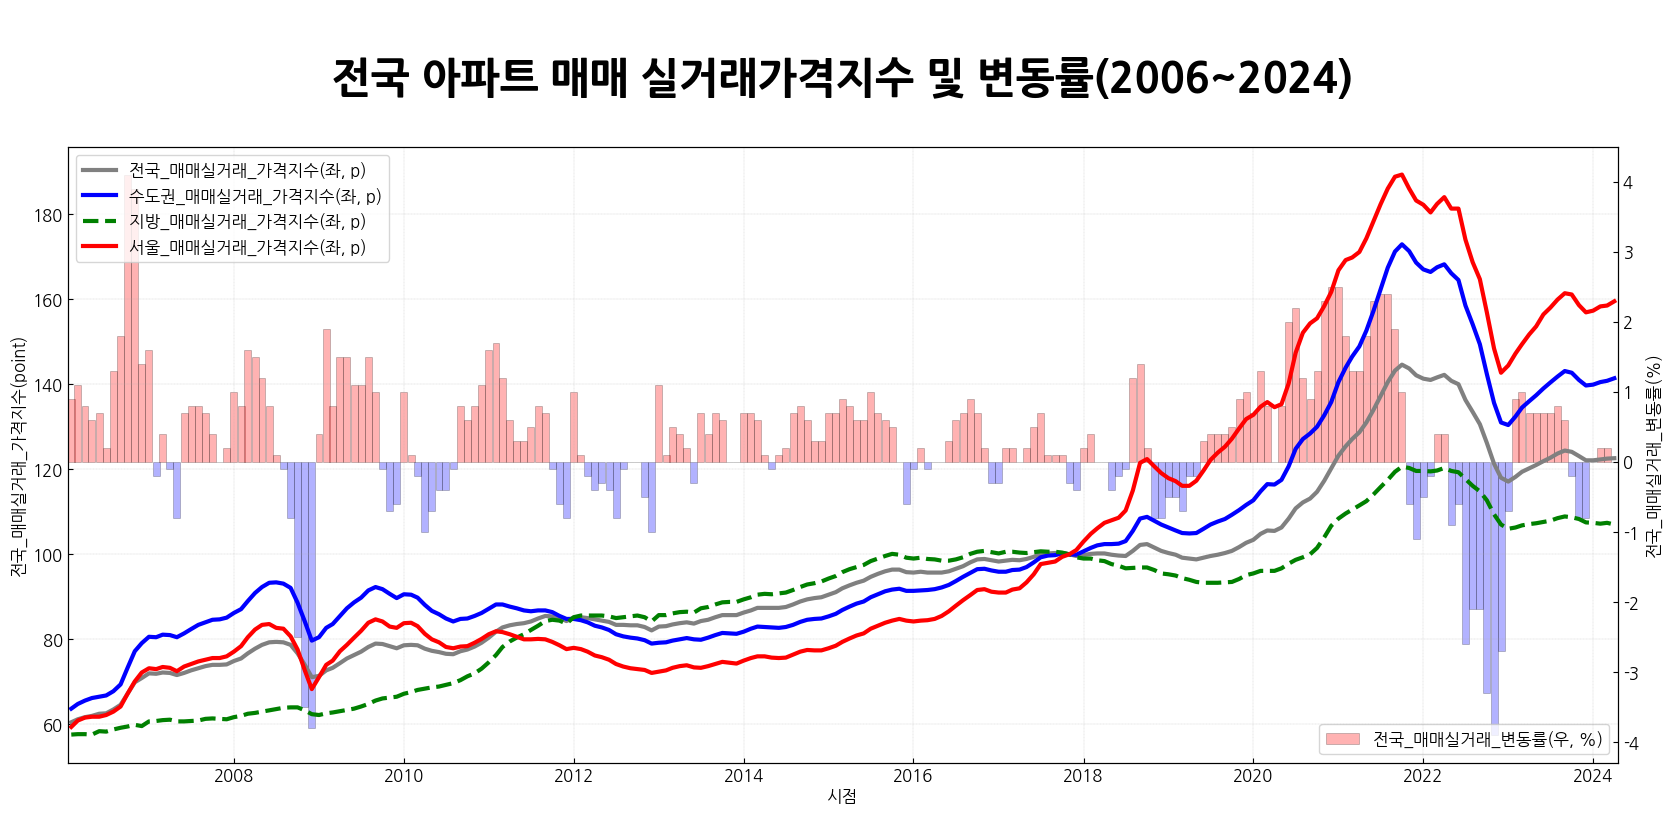

In [49]:
# 1. 기본 스타일 설정
plt.style.use('default')
plt.rcParams['figure.figsize'] = (20, 8)
plt.rcParams['font.size'] = 12
plt.rcParams['axes.unicode_minus'] = False
plt.rc('font', family='NanumGothic')

# 2. 데이터 준비
x = df_price['시점']

y_전국 = df_price['전국_지수']
y_수도권 = df_price['수도권_지수']
y_지방 = df_price['지방_지수']
y_서울 = df_price['서울_지수']

y2 = df_price['전국_증감률']


# 3. 그래프 그리기
# 제목
fig, ax1 = plt.subplots()

# y1 : 
ax1.plot(x, y_전국, color='gray', linewidth=3, label='전국_매매실거래_가격지수(좌, p)')
ax1.plot(x, y_수도권, color='blue', linewidth=3, label='수도권_매매실거래_가격지수(좌, p)')
ax1.plot(x, y_지방, '--', color='green', linewidth=3, label='지방_매매실거래_가격지수(좌, p)')
ax1.plot(x,y_서울, color='red', linewidth=3, label='서울_매매실거래_가격지수(좌, p)')

# ax1.set_ylim(0, 200)
ax1.set_xlabel('시점')
ax1.set_ylabel('전국_매매실거래_가격지수(point)')
ax1.tick_params(axis='both', direction='in')

# y2 : 
ax2 = ax1.twinx()
# ax2.bar(x, y2, width=30, color='darkgray', edgecolor = 'black',linewidth=0.5, alpha=0.6, label='전국_매매실거래_변동률(우, %)')

color_fuc = lambda x : 'r' if x >=0 else 'b'
color_list = list(y2.fillna(0).apply(color_fuc))

ax2.bar(x, y2, width=30, color=color_list, edgecolor = 'black',linewidth=0.5, alpha=0.3, label='전국_매매실거래_변동률(우, %)')


ax2.set_ylabel('전국_매매실거래_변동률(%)')
ax2.tick_params(axis='y', direction='in')

# set_zorder() 메서드는 z-축 방향의 순서를 지정합니다.
ax1.set_zorder(ax2.get_zorder() + 10)
ax1.patch.set_visible(False)

ax1.legend(loc='upper left')
ax2.legend(loc='lower right')

ax1.grid(linestyle='--',linewidth='0.2')

plt.title('\n 전국 아파트 매매 실거래가격지수 및 변동률(2006~2024) \n', fontsize=30, fontweight=1000)

plt.margins(x=0)
plt.show()

# 과제2. 전국 주간 주택매매 및 전세 가격 변동률 시각화
* 목표 : 앞선 2가지 데이터 분석을 종합하여 인사이트를 도출할 수 있다.

# 전국주택가격동향조사 2024년 7월 2주 주간 아파트 동향

[한국부동산원](https://www.reb.or.kr/r-one/na/ntt/selectNttInfo.do?mi=9508&nttSn=91532)

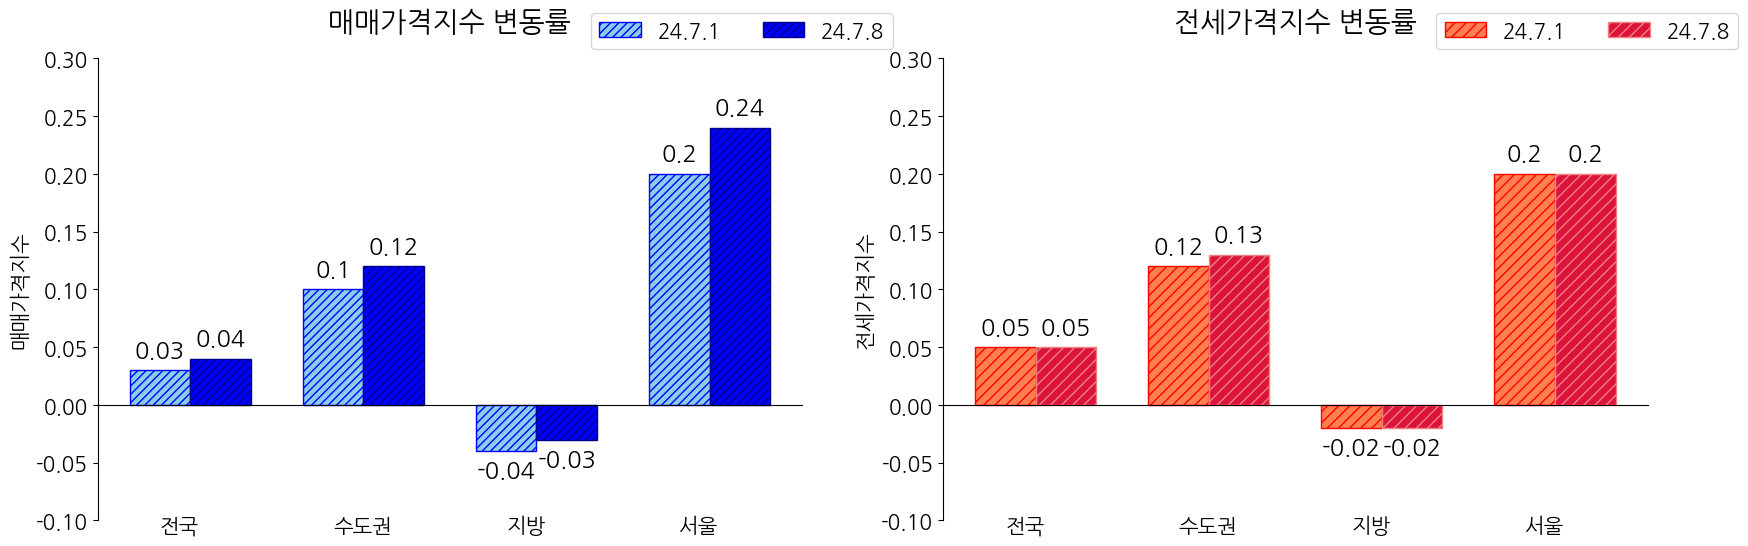

In [55]:
import matplotlib.pyplot as plt
import numpy as np

# plt.rc('font', family='NanumGothic')
plt.rcParams['font.family'] = 'NanumGothic' 
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.size'] = 15

# 매매가격지수 변동률
labels = ['전국', '수도권', '지방', '서울']

price_1weekago = [0.03, 0.10, -0.04, 0.20] # 수정
price_now = [0.04, 0.12, -0.03, 0.24] # 수정

# 전세가격지수 변동률
junse_1weekago = [0.05, 0.12, -0.02, 0.20] # 수정
junse_now = [0.05, 0.13, -0.02, 0.20]  # 수정

x = np.arange(len(labels))  # the label locatfions
width = 0.35  # the width of the bars

fig = plt.figure(figsize=(20,6))
ax = fig.subplots(nrows=1, ncols=2)

## 매매가격지수 변동률

date_1weekago ='24.7.1'
date = '24.7.8'

rects1 = ax[0].bar(x - width/2, price_1weekago, width, label=date_1weekago, hatch='////',facecolor='skyblue', edgecolor='blue')
rects2 = ax[0].bar(x + width/2, price_now, width, label=date,  hatch='////',facecolor='blue', edgecolor='darkblue')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax[0].set_ylabel('매매가격지수')
ax[0].set_title('매매가격지수 변동률', size=20, pad=20)
ax[0].legend(ncol=2, loc=(0.7, 1.02), fontsize=15)

# ax.invert_yaxis()
ax[0].bar_label(rects1, padding=6, size=17)
ax[0].bar_label(rects2, padding=6, size=17)

ax[0].spines['right'].set_visible(False)
ax[0].spines['bottom'].set_visible(False)
ax[0].spines['top'].set_position(('data',0))

# plt.rc('legend', fontsize=10)  # 범례 폰트 크기
ax[0].set_ylim([-0.10, 0.30]) 
ax[0].tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off

ax[0].text(0-width/2, ax[0].get_ylim()[0]-0.01, '전국')
ax[0].text(1-width/2, ax[0].get_ylim()[0]-0.01, '수도권')
ax[0].text(2-width/2, ax[0].get_ylim()[0]-0.01, '지방')
ax[0].text(3-width/2, ax[0].get_ylim()[0]-0.01, '서울')

## 전세가격지수 변동률

rects3 = ax[1].bar(x - width/2, junse_1weekago, width, label=date_1weekago, hatch='///',facecolor='coral', edgecolor='red')
rects4 = ax[1].bar(x + width/2, junse_now, width, label=date,  hatch='///',facecolor='crimson', edgecolor='lightcoral')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax[1].set_ylabel('전세가격지수')
ax[1].set_title('전세가격지수 변동률', size=20, pad=20)
ax[1].legend(ncol=2, loc=(0.7, 1.02), fontsize=15)
# ax.invert_yaxis()
ax[1].bar_label(rects3, padding=6, size=17)
ax[1].bar_label(rects4, padding=6, size=17)

ax[1].spines['right'].set_visible(False)
ax[1].spines['bottom'].set_visible(False)
ax[1].spines['top'].set_position(('data',0))

# ax[1].hlines(0)
# ax[1].spine[     es(-0.62, 1.0, 2.5, color='gray', linestyle='solid', linewidth=3)

# plt.rc('legend', fontsize=10)  # 범례 폰트 크기
ax[1].set_ylim([-0.10, 0.30]) 
ax[1].tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off


ax[1].text(0-width/2, ax[1].get_ylim()[0]-0.01, '전국')
ax[1].text(1-width/2, ax[1].get_ylim()[0]-0.01, '수도권')
ax[1].text(2-width/2, ax[1].get_ylim()[0]-0.01, '지방')
ax[1].text(3-width/2, ax[1].get_ylim()[0]-0.01, '서울')

# fig.tight_layout()

# plt.title('\n2024 1월 3주 주간 아파트 매매 및 전세가격지수 변동률 \n', fontsize=30, font="NanumGothic")
plt.show()